-0.22507907903927654
0.09323080714451408
0.24362383960110814
0.75
2.7488935718910694
0.4391503721960506
81


<IPython.core.display.Javascript object>


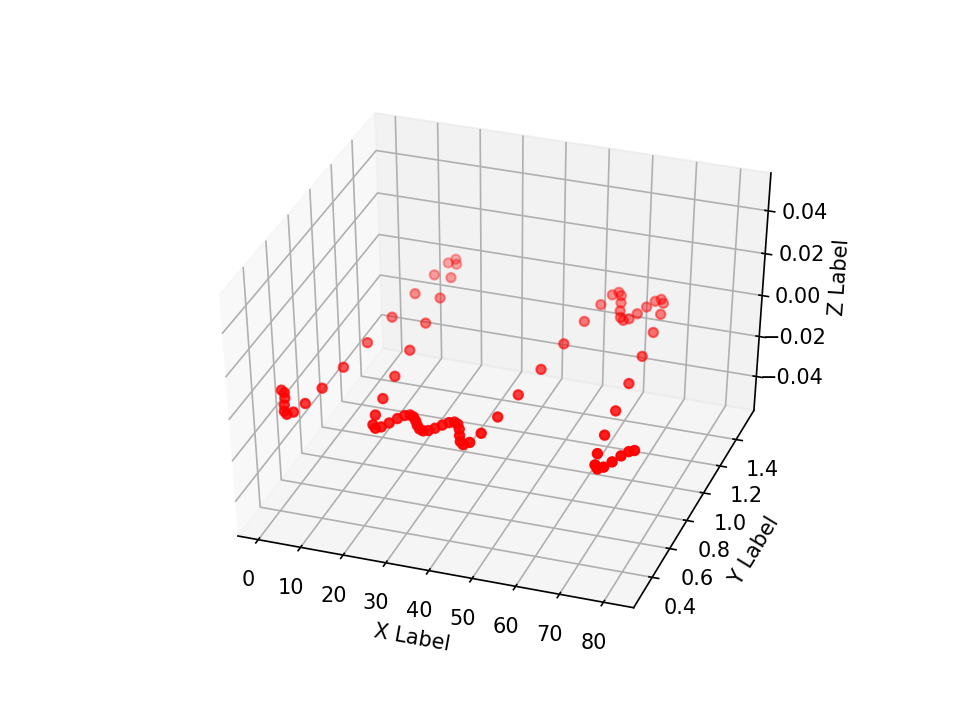

In [53]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import scipy.integrate as integrate
import math

%matplotlib notebook

bps = 300 #en bps
bandwidth = 3000 #en Hz
byte = '01000110'
f = 1/8

numberHarmonics = 7 #revisar cómo calcularlo
ti = 0 #revisar cómo calcularlo
tf = 8 #revisar cómo calcularlo
increment = 0.1 #revisar cómo calcularlo


def an(n):
    sumIntegral = 0
    for i in range(8):
        if(byte[i] == '1'):
            ans, err = integrate.quad(lambda t: math.sin(2*math.pi*n*f*t), i, i+1)
            #print('integrando de ',i,' hasta ',i+1)
            sumIntegral += (2/8)*ans
    return sumIntegral
    
print(an(1))


def bn(n):
    sumIntegral = 0
    for i in range(8):
        if(byte[i] == '1'):
            ans, err = integrate.quad(lambda t: math.cos(2*math.pi*n*f*t), i, i+1)
            sumIntegral += (2/8)*ans
    return sumIntegral

print(bn(1))


def cn(n):
    return math.sqrt( an(n)**2 + bn(n)**2 )

print(cn(1))


def dc():
    sumIntegral = 0
    for i in range(8):
        if(byte[i] == '1'):
            ans, err = integrate.quad(lambda t: 1, i, i+1)
            sumIntegral += (2/8)*ans
    return sumIntegral

print(dc())


def teta(n):
    return math.atan2( bn(n),an(n) ) 

print(teta(1))


def g(t):
    sum = dc()
    for i in range(1,numberHarmonics+1):
        sum += cn(i) * math.sin( 2*math.pi*i*f*t + teta(i) )
        #print(i)
    return sum

print(g(0))


dataNumber = 0
x = []
y = []

i = ti
while (i <= tf):
    dataNumber += 1
    x.append(dataNumber)
    y.append( g(i) )
    i += 0.1

print(dataNumber)

    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#x =[1,2,3,4,5,6,7,8,9,10]
#y =[5,6,2,3,13,4,1,2,4,8]

z = []

for i in range(len(x)):
    z.append(0)
    
#z =[2,3,3,3,5,7,9,11,9,10]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()